<a href="https://colab.research.google.com/github/P1nkP1sY/G.231.22.0006_Deannys-Anugerah-F/blob/main/TS_G_231_22_0006ipynb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import numpy
from pandas import read_csv
from sklearn.metrics import mean_squared_error
from math import sqrt
from math import log
from math import exp
from scipy.stats import boxcox
from pandas import DataFrame
from pandas import Grouper
from pandas import Series
from pandas import concat
from pandas.plotting import lag_plot
from matplotlib import pyplot
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.arima_model import ARIMA
from statsmodels.tsa.arima_model import ARIMAResults
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf
from statsmodels.graphics.gofplots import qqplot


In [3]:
series = read_csv('https://docs.google.com/spreadsheets/d/e/2PACX-1vQEhaW87ezv2ot9Cpen03Yv0PReDG_-_scF-hadaxw9zOiyWT1Y2VKWBnAb6GXRgAAJfKEZvXjKQPBb/pub?output=csv', header=0, index_col=0, parse_dates=True).squeeze("columns")
print(series.head())

Month
1949-01-01    112
1949-02-01    118
1949-03-01    132
1949-04-01    129
1949-05-01    121
Name: #Passengers, dtype: int64


In [4]:
print(series.describe())

count    144.000000
mean     280.298611
std      119.966317
min      104.000000
25%      180.000000
50%      265.500000
75%      360.500000
max      622.000000
Name: #Passengers, dtype: float64


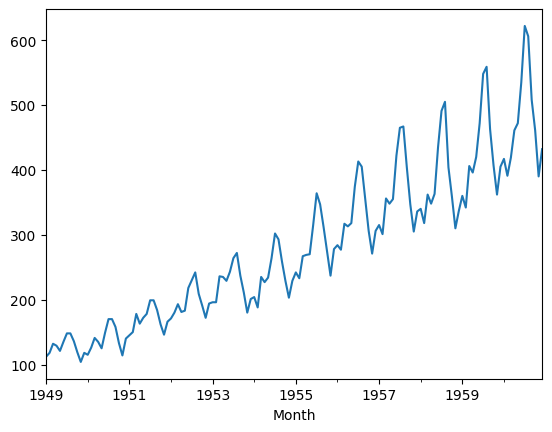

In [5]:
#visualisasi nilai pada plot garis, yang dapat memberikan banyak wawasan tentang masalah tersebut
series.plot()
pyplot.show()

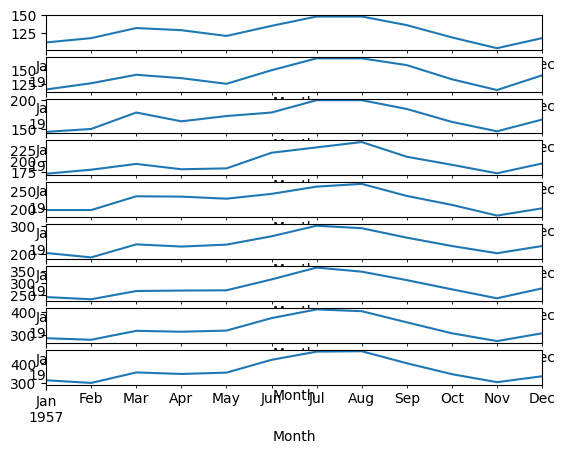

In [6]:
#konfirmasi asumsi dengan plot garis tahunan
groups = series['1949':'1957'].groupby(Grouper(freq='A'))
years = DataFrame()
pyplot.figure()
i = 1
for name, group in groups:
    pyplot.subplot(len(groups), 1, i)
    group.plot()
    i += 1
pyplot.show()

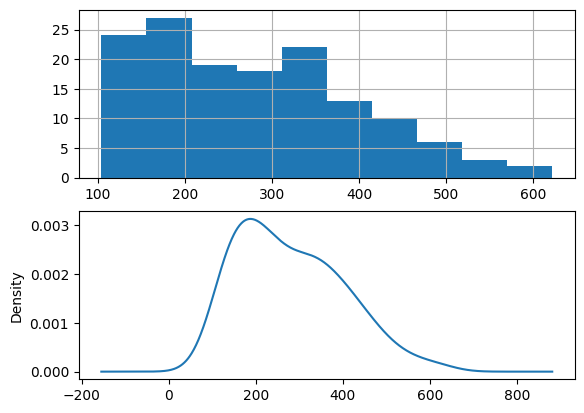

In [7]:
# struktuk data
pyplot.figure(1)
pyplot.subplot(211)
series.hist()
pyplot.subplot(212)
series.plot(kind='kde')
pyplot.show()

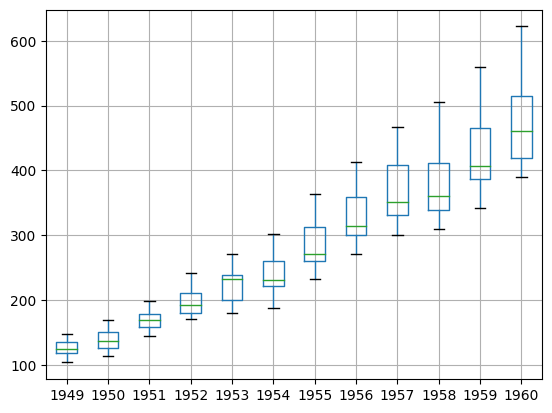

In [9]:
#analisis data bulanan  berdasarkan tahun dan gambaran tentang penyebaran observasi untuk setiap tahun
groups =series['1949':'1960'].groupby(Grouper(freq='A'))
years =DataFrame()
for name, group in groups:
  years[name.year] = group.values
years.boxplot()
pyplot.show()


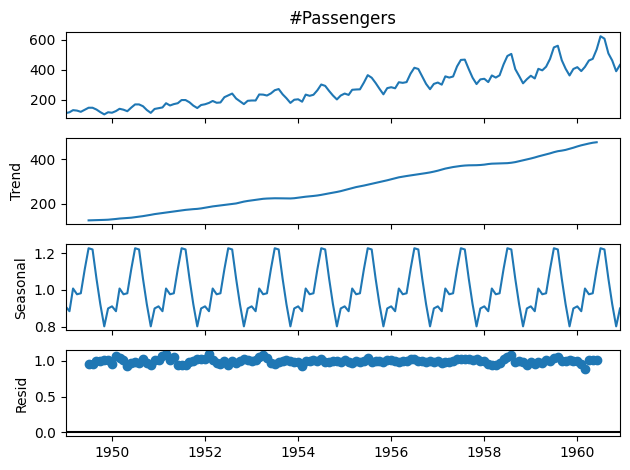

In [10]:
#uraikan deret waktu untuk kejelasan lebih lanjut tentang komponennya -level, tren, musiman, dan kebisingan
result = seasonal_decompose(series, model='multiplicative')
result.plot()
pyplot.show()